In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from iminuit import Minuit   
from scipy import stats
from scipy.stats import linregress
import sys
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


sys.path.append(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\AppStats\AppStat2023\External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax

## File 2024eca

(2.0, 10.0)

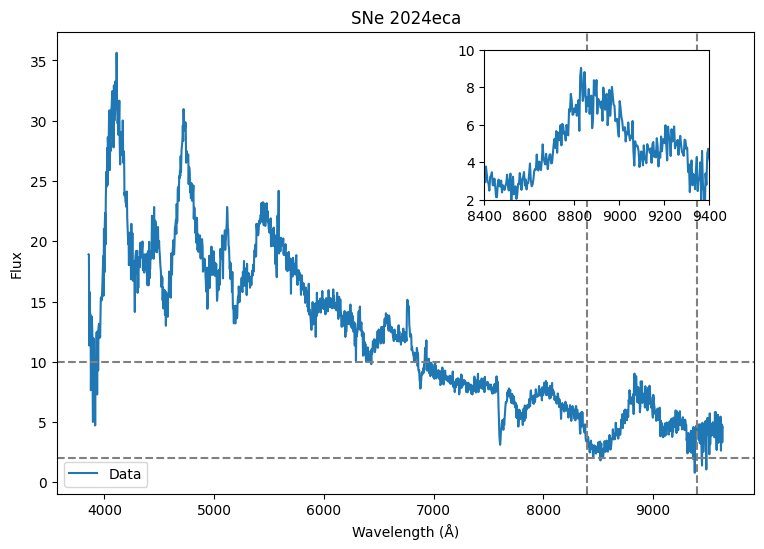

In [3]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca\2024eca-ALFOSC-2024-03-18.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eca = f.wave
flux_eca = f.flux
fluxerr_eca = f.fluxerr

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(wave_eca, flux_eca, label='Data')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()
# Define the region for the zoomed box
x1, x2, y1, y2 = 8400, 9400, 2, 10

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_eca, flux_eca, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

# plt.show()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca_triplet.pdf', dpi=200)


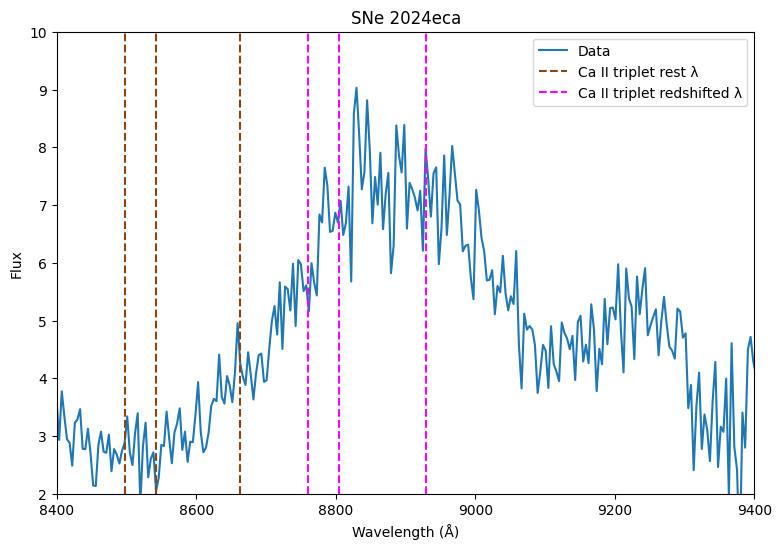

In [4]:
z_eca = 0.030804 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_eca = 8498
wave_rest_2_eca = 8542
wave_rest_3_eca = 8662

wave_obs_1_eca = (1+z_eca)*wave_rest_1_eca
wave_obs_2_eca = (1+z_eca)*wave_rest_2_eca
wave_obs_3_eca = (1+z_eca)*wave_rest_3_eca

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_eca, flux_eca, label='Data')

plt.axvline(wave_rest_1_eca, ls='--', c='saddlebrown', label='Ca II triplet rest λ')
plt.axvline(wave_rest_2_eca, ls='--', c='saddlebrown')
plt.axvline(wave_rest_3_eca, ls='--', c='saddlebrown')   

ax.axvline(wave_obs_1_eca, ls='--', c='magenta', label='Ca II triplet redshifted λ')
ax.axvline(wave_obs_2_eca, ls='--', c='magenta')
ax.axvline(wave_obs_3_eca, ls='--', c='magenta')

plt.xlim(8400, 9400)
plt.ylim(2,10)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()

plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca_redshift.pdf', dpi=200)


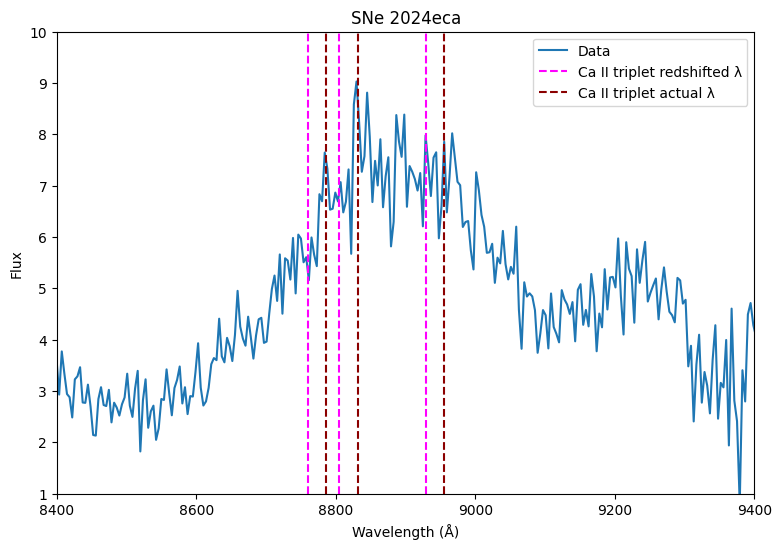

In [5]:
dl_eca = 26
wave_actual_1_eca = wave_obs_1_eca + dl_eca
wave_actual_2_eca = wave_obs_2_eca + dl_eca
wave_actual_3_eca = wave_obs_3_eca + dl_eca

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_eca, flux_eca, label='Data')

plt.axvline(wave_obs_1_eca, ls='--', c='magenta', label='Ca II triplet redshifted λ')
plt.axvline(wave_obs_2_eca, ls='--', c='magenta')
plt.axvline(wave_obs_3_eca, ls='--', c='magenta')

plt.axvline(wave_actual_1_eca, ls='--', c='darkred', label='Ca II triplet actual λ')
plt.axvline(wave_actual_2_eca, ls='--', c='darkred')
plt.axvline(wave_actual_3_eca, ls='--', c='darkred')

plt.xlim(8400, 9400)
plt.ylim(1,10)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()

# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca_redshift_actual.pdf', dpi=200)


In [6]:
u_eca = (dl_eca * c) / wave_obs_2_eca
print(u_eca)

882.8946274070693


(2.0, 10.0)

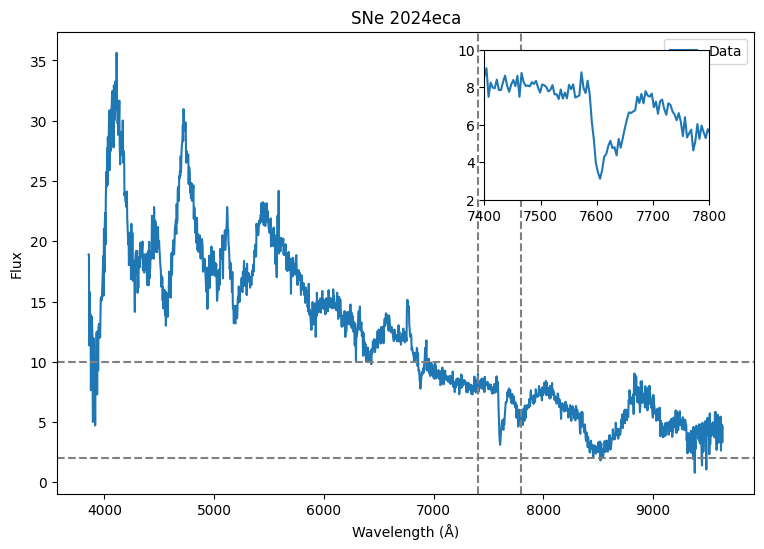

In [7]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024eca\2024eca-ALFOSC-2024-03-18.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eca = f.wave
flux_eca = f.flux
fluxerr_eca = f.fluxerr

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(wave_eca, flux_eca, label='Data')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()
# Define the region for the zoomed box
x1, x2, y1, y2 = 7400, 7800, 2, 10

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_eca, flux_eca, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

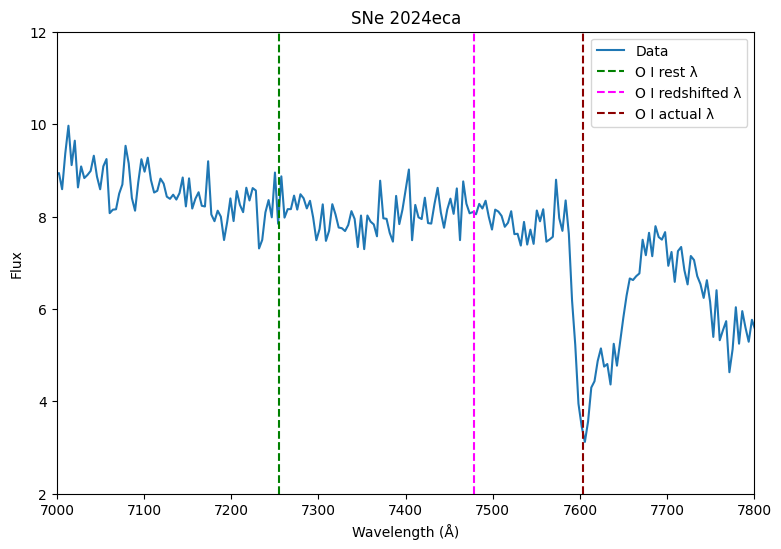

In [8]:
z_eca = 0.030804 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_eca = 7254.448


wave_obs_1_eca = (1+z_eca)*wave_rest_1_eca


dl_eca = 126

wave_actual_3_eca = wave_obs_1_eca + dl_eca

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_eca, flux_eca, label='Data')

plt.axvline(wave_rest_1_eca, ls='--', c='green', label='O I rest λ')
 
ax.axvline(wave_obs_1_eca, ls='--', c='magenta', label='O I redshifted λ')

plt.axvline(wave_actual_3_eca, ls='--', c='darkred', label='O I actual λ')


plt.xlim(7000, 7800)
plt.ylim(2,12)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()


In [9]:
u_eca = (dl_eca * c) / wave_obs_2_eca
print(u_eca)

4278.643194357336


## File 2023ajy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1.0, 11.0)

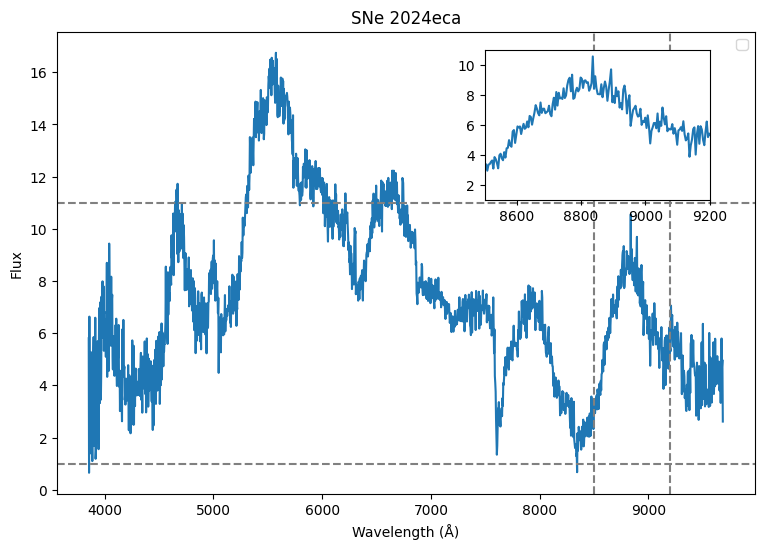

In [10]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy\2024ajy-ALFOSC-2024-02-01.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_ajy = f.wave
flux_ajy = f.flux
fluxerr_ajy = f.fluxerr

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_ajy, flux_ajy)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024eca')
plt.legend()
x1, x2, y1, y2 = 8500, 9200, 1, 11

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_ajy, flux_ajy, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

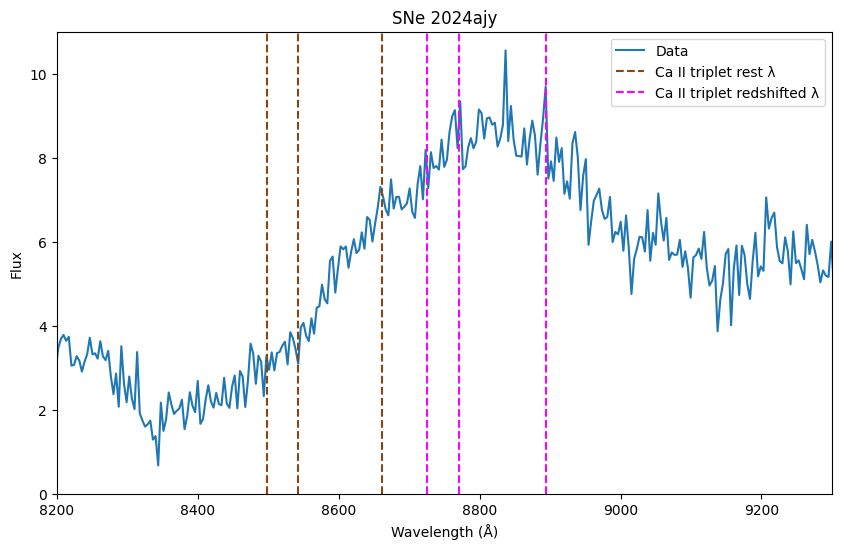

In [11]:
z_ajy = 0.0268 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_ajy = 8498
wave_rest_2_ajy = 8542
wave_rest_3_ajy = 8662

wave_obs_1_ajy = (1+z_ajy)*wave_rest_1_ajy
wave_obs_2_ajy = (1+z_ajy)*wave_rest_2_ajy
wave_obs_3_ajy = (1+z_ajy)*wave_rest_3_ajy

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(wave_ajy, flux_ajy, label='Data')

plt.axvline(wave_rest_1_ajy, ls='--', c='saddlebrown', label='Ca II triplet rest λ')
plt.axvline(wave_rest_2_ajy, ls='--', c='saddlebrown')
plt.axvline(wave_rest_3_ajy, ls='--', c='saddlebrown')

plt.axvline(wave_obs_1_ajy, ls='--', c='magenta', label='Ca II triplet redshifted λ')
plt.axvline(wave_obs_2_ajy, ls='--', c='magenta')
plt.axvline(wave_obs_3_ajy, ls='--', c='magenta')


plt.xlim(8200, 9300)
plt.ylim(0,11)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024ajy')
plt.legend()

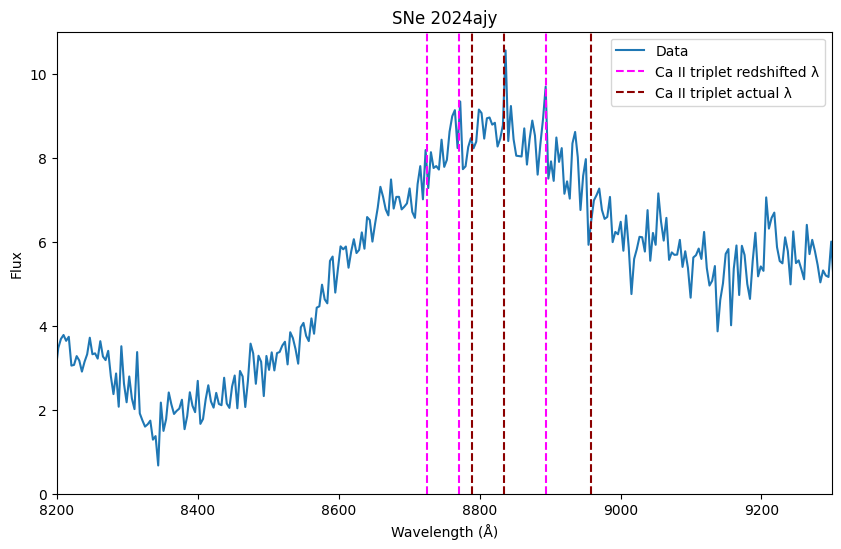

In [12]:
dl_ajy = 64
wave_actual_1_ajy = wave_obs_1_ajy + dl_ajy
wave_actual_2_ajy = wave_obs_2_ajy + dl_ajy
wave_actual_3_ajy = wave_obs_3_ajy + dl_ajy

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(wave_ajy, flux_ajy, label='Data')

plt.axvline(wave_obs_1_ajy, ls='--', c='magenta', label='Ca II triplet redshifted λ')
plt.axvline(wave_obs_2_ajy, ls='--', c='magenta')
plt.axvline(wave_obs_3_ajy, ls='--', c='magenta')

plt.axvline(wave_actual_1_ajy, ls='--', c='darkred', label='Ca II triplet actual λ')
plt.axvline(wave_actual_2_ajy, ls='--', c='darkred')
plt.axvline(wave_actual_3_ajy, ls='--', c='darkred')

plt.xlim(8200, 9300)
plt.ylim(0,11)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024ajy')
plt.legend()


In [13]:
u_ajy = (dl_ajy * c) / wave_obs_2_ajy
print(u_ajy)


2181.7537706624717


# 2024ajy O I 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1.0, 8.0)

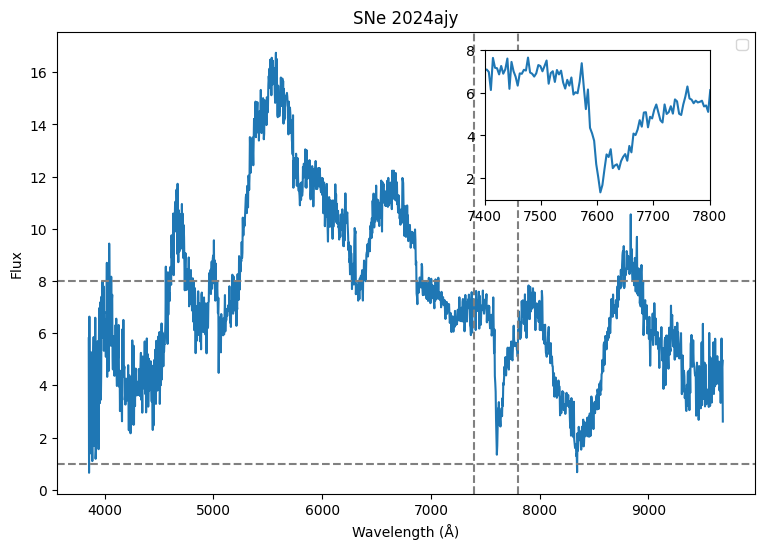

In [14]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024ajy\2024ajy-ALFOSC-2024-02-01.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_ajy = f.wave
flux_ajy = f.flux
fluxerr_ajy = f.fluxerr

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_ajy, flux_ajy)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024ajy')
plt.legend()
x1, x2, y1, y2 = 7400, 7800, 1, 8

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_ajy, flux_ajy, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

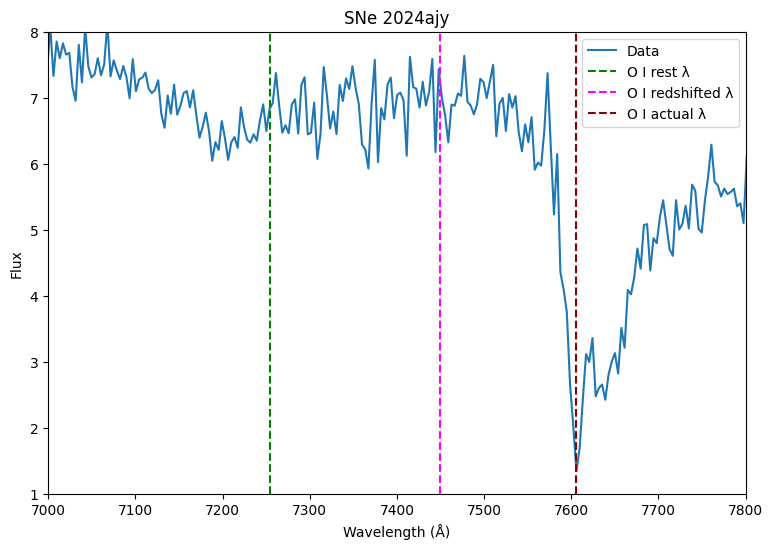

In [15]:
z_ajy = 0.0268 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_ajy = 7254.448


wave_obs_1_ajy = (1+z_ajy)*wave_rest_1_ajy


dl_ajy = 156

wave_actual_3_ajy = wave_obs_1_ajy + dl_ajy

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_ajy, flux_ajy, label='Data')

plt.axvline(wave_rest_1_ajy, ls='--', c='green', label='O I rest λ')
 
ax.axvline(wave_obs_1_ajy, ls='--', c='magenta', label='O I redshifted λ')

plt.axvline(wave_actual_3_ajy, ls='--', c='darkred', label='O I actual λ')


plt.xlim(7000, 7800)
plt.ylim(1,8)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024ajy')
plt.legend()

In [16]:
u_ajy = (dl_ajy * c) / wave_obs_2_ajy
print(u_ajy)

5318.024815989775


# 2024bic O I

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1.0, 8.0)

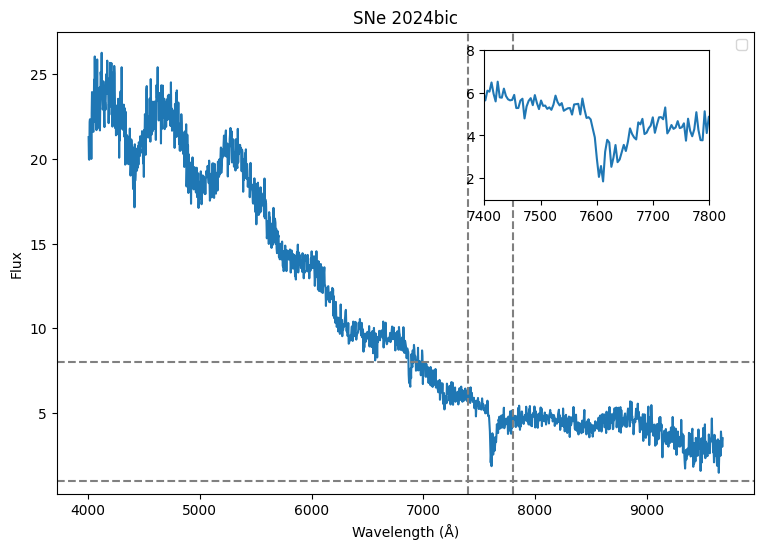

In [17]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2024bic\2024bic-ALFOSC-2024-02-03.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_bic = f.wave
flux_bic = f.flux

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_bic, flux_bic)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024bic')
plt.legend()
x1, x2, y1, y2 = 7400, 7800, 1, 8

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_bic, flux_bic, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

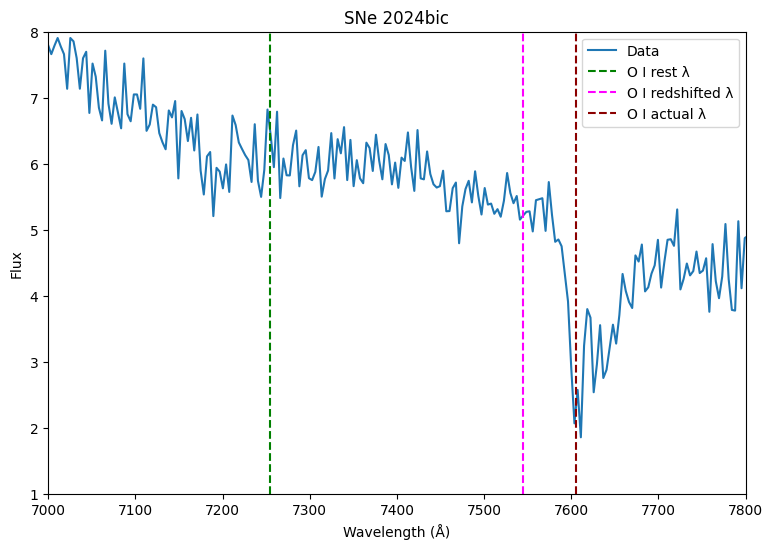

In [18]:
z_bic = 0.04 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_bic = 7254.448


wave_obs_1_bic = (1+z_bic)*wave_rest_1_bic


dl_bic = 61

wave_actual_3_bic = wave_obs_1_bic + dl_bic

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_bic, flux_bic, label='Data')

plt.axvline(wave_rest_1_bic, ls='--', c='green', label='O I rest λ')
 
ax.axvline(wave_obs_1_bic, ls='--', c='magenta', label='O I redshifted λ')

plt.axvline(wave_actual_3_bic, ls='--', c='darkred', label='O I actual λ')


plt.xlim(7000, 7800)
plt.ylim(1,8)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2024bic')
plt.legend()

In [19]:
u_bic = (dl_bic * c) / wave_obs_1_bic
print(u_bic)

2417.4823501388387


## 2023eeb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.05, 0.3)

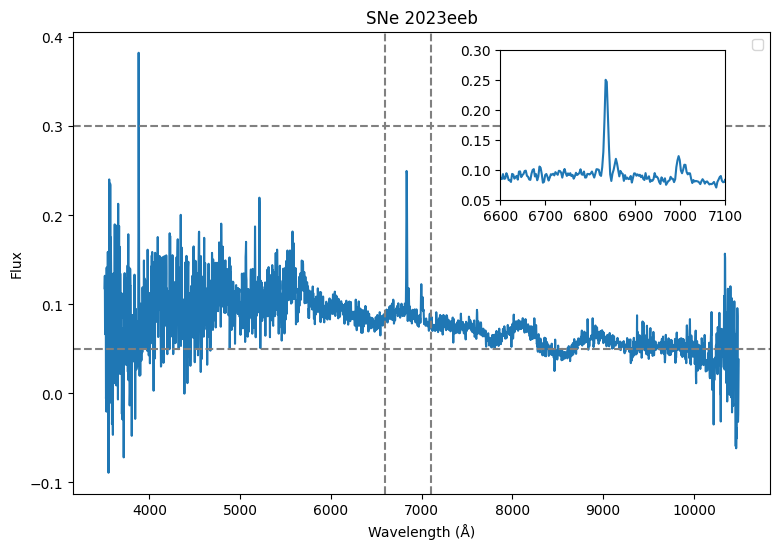

In [27]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023eeb\2023eeb-KAST-2023-04-12.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_eeb = f.wave
flux_eeb = f.flux

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_eeb, flux_eeb)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2023eeb')
plt.legend()
x1, x2, y1, y2 = 6600, 7100, 0.05, 0.3

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_eeb, flux_eeb, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

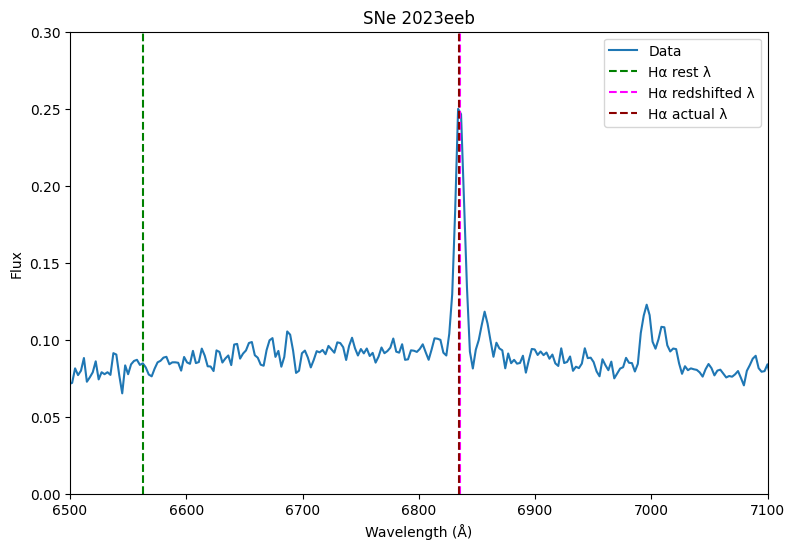

In [36]:
z_eeb = 0.0415 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_eeb = 6562.819


wave_obs_1_eeb = (1+z_eeb)*wave_rest_1_eeb


dl_eeb = -1

wave_actual_3_eeb = wave_obs_1_eeb + dl_eeb

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_eeb, flux_eeb, label='Data')

plt.axvline(wave_rest_1_eeb, ls='--', c='green', label='Hα rest λ')
 
ax.axvline(wave_obs_1_eeb, ls='--', c='magenta', label='Ηα redshifted λ')

plt.axvline(wave_actual_3_eeb, ls='--', c='darkred', label='Ηα actual λ')


plt.xlim(6500, 7100)
plt.ylim(0,0.3)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2023eeb')
plt.legend()

## 2023aaby

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-16, 2e-16)

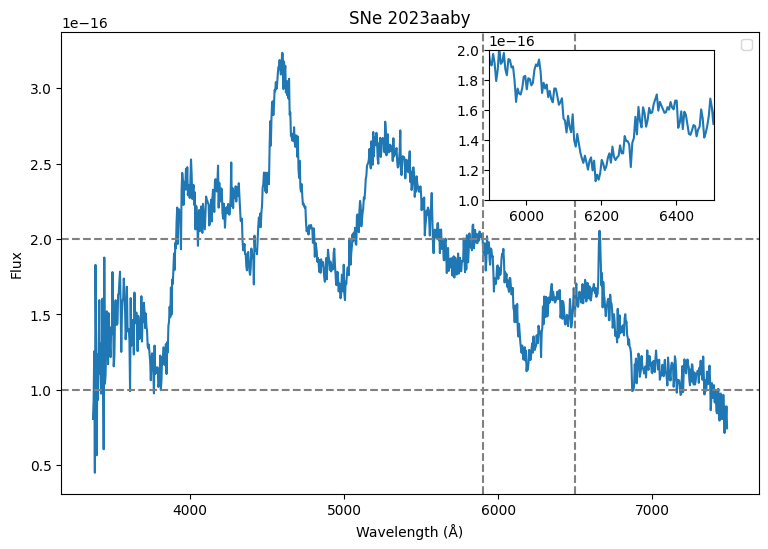

In [44]:
file = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectral_data\2023aaby\2023aaby-EFOSC2-NTT-2023-12-16.csv"

f = pd.read_csv(file, sep=',')
f.columns = ['wave', 'flux', 'fluxerr']
wave_aaby = f.wave
flux_aaby = f.flux

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(wave_aaby, flux_aaby)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2023aaby')
plt.legend()
x1, x2, y1, y2 = 5900, 6500, 1.e-16, 2.e-16

ax.axvline(x1, color='gray', linestyle='--')
ax.axvline(x2, color='gray', linestyle='--')
ax.axhline(y1, color='gray', linestyle='--')
ax.axhline(y2, color='gray', linestyle='--')

# Create inset of the zoomed region
ax_inset = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.plot(wave_eeb, flux_eeb, label='Zoomed In')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

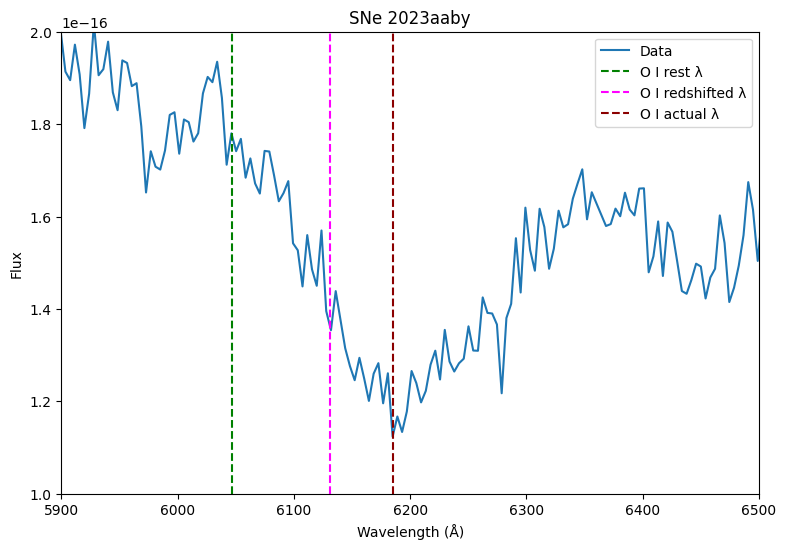

In [49]:
z_aaby = 0.014 #redshift
c = 2.99e5 #speed of light in km/s

wave_rest_1_aaby = 6046.440	


wave_obs_1_aaby = (1+z_aaby)*wave_rest_1_aaby


dl_aaby = 54

wave_actual_3_aaby = wave_obs_1_aaby + dl_aaby

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(wave_aaby, flux_aaby, label='Data')

plt.axvline(wave_rest_1_aaby, ls='--', c='green', label='O I rest λ')
 
ax.axvline(wave_obs_1_aaby, ls='--', c='magenta', label='O I redshifted λ')

plt.axvline(wave_actual_3_aaby, ls='--', c='darkred', label='O I actual λ')


plt.xlim(5900, 6500)
plt.ylim(1.e-16,2.e-16)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('SNe 2023aaby')
plt.legend()

In [50]:
u_aaby = (dl_aaby * c) / wave_obs_1_aaby
print(u_aaby)

2633.463149072334
